<h1>Preparacion de Datos Proyecto 2</h1>
<h2>Grupo 5</h2>


<h3>Limpieza y preparacion de los datos</h3>

<h4>Descripción de los datos</h4>

* Análisis de los datos: contienen XXXX registros y XXX variables diferentes.

* Variables y tipos de datos: contiene XXX variables de las cuales XXX de ellas son numéricas. 

* XX son variables categóricas. 

* Variables Numéricas:

A continuación se ve información relevante sobre las variables numéricas:

XX se encuentra entre XX y XX, con una desviación estándar que sugiere una alta variabilidad de los datos (XX aproximadamente). 



<h4>Exploración de los datos:</h4>

Outliers: se presentan outliers en XXXX con respecto al diccionario de datos
    

<h4>Calidad de los datos:</h4>

Datos Duplicados: Se identificaron XX datos duplicados en el conjunto de datos.

Datos incompletos o vacíos: Se encontraron datos vacíos en las variables:

Datos categóricos en variables numéricas: Evento es un dato categórico que está representado con variable numérica. Debido a que de este dato no se conoce lo que representa o un rango de valores esperado se planea su eliminación ya que al momento de interpretar la información del modelo no se tendrá claro su significado. 

Problemas de validez de datos: 

<h4>Entendimiento de datos:</h4>

Datos duplicados: Se eliminan los datos duplicados

Datos incompletos o vacíos: 


Se eliminan los valores atípicos ya que pueden afectar negativamente al modelo.

Finalmente, el conjunto de datos posee XXXX registros y XXX variables

<h4> 0. Carga de librerías necesarias para implementación y carga de datos</h4>

In [5]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import ydata_profiling as pp

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder



from ydata_profiling import ProfileReport

from matplotlib import cm

import warnings
# Ignorar la advertencia RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.", category=FutureWarning)

In [6]:
# Se cargan los datos. 
df_condiciones = pd.read_csv('data/2017Datos de la vivenda y su entorno  ( Capitulo B).csv',  sep=';',encoding="ISO-8859-1")
# se carga el diccionario
df_diccio = pd.read_excel('data/Diccionario_anonimizado_DANE_EM2021.xlsx')

<strong><h4>1. Entendimiento de los datos</h4></strong>

Para entender los datos se considera importante entender la cantidad de datos que se tiene, verificar cuantas columnas y filas tienen los datos proporcionados

In [7]:
df_dim = df_condiciones.shape
print(">> El dataframe contiene {} columnas y {} filas\n".format(df_dim[1], df_dim[0]))
print(">> El dataframe se ve de la siguiente forma: ")
df_condiciones.head()

>> El dataframe contiene 51 columnas y 107218 filas

>> El dataframe se ve de la siguiente forma: 


ï»¿DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN  NVCBP1 NVCBP2  NVCBP3  \
0         101000          1            1      1       4      1       1   
1         101001          1            1      1       2      2       1   
2         101002          1            1      1       2      2       1   
3         101003          1            1      1       2      3       1   
4         101004          1            1      1       4      1       1   

   NVCBP4  NVCBP5  NVCBP6  ... NVCBP14K  NVCBP15A  NVCBP15B  NVCBP15C  \
0       2       1       3  ...        2         1         2         1   
1       2       1       3  ...        2         2         2         2   
2       2       1       2  ...        2         2         2         1   
3       2       2       3  ...        2         2         2         1   
4       1       1       3  ...        2         2         2         2   

   NVCBP15D  NVCBP15E  NVCBP15F  NVCBP15G  NVCBP15H         FEX_C  
0         2         1         2         2         2  16,604442041  
1         2         2         2         2         1  26,046357048  
2         2         2         2         2         2  13,840826089  
3         1         2         2         1         1  7,0111108805  
4         2         2         2         2         2  67,930390356  

[5 rows x 51 columns]

In [8]:

pd.set_option('display.max_colwidth', None)
df_diccio.rename(columns={'ï»¿Variable name': 'Column'}, inplace=True)
print(">> El diccionario de datos es el siguiente: ")
df_diccio[['NOMBRE COLUMNA', 'TEXTO_PREGUNTA']]

>> El diccionario de datos es el siguiente: 


NOMBRE COLUMNA  \
0         DIRECTORIO   
1               DPTO   
2               MPIO   
3              CLASE   
4      COD_LOCALIDAD   
...              ...   
1588    NHCMP12AUA24   
1589  NHCMP12AUB24_1   
1590  NHCMP12AUB24_2   
1591  NHCMP12AUB24_3   
1592  NHCMP12AUB24_4   

                                                                                                                                                                                                                                   TEXTO_PREGUNTA  
0                                                                                                                                                                                                              Identificador numérico de vivienda  
1                                                                                                                                                                                                                                 1. Departamento  
2                                                                                                                                                                                                                                    2. Municipio  
3                                                                                                                                                                                                                                           clase  
4                                                                                                                                                                                                                          Código de la localidad  
...                                                                                                                                                                                                                                           ...  
1588                                             12.2.25.25 Insumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios                                                                      ¿En cuánto estima el valor obtenido  
1589  12.2.25. ¿Cómo lo obtuvieron?                                                                                              1 Tomado de un negocio del hogar\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios    
1590     12.2.25 ¿Cómo lo obtuvieron?                                                                                            2 Recibido como pago por trabajo\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios    
1591                          12.2.25  ¿Cómo lo obtuvieron?                                                                                            3 Regalado\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios    
1592   12.2.25 ¿Cómo lo obtuvieron?                                                                                                   4 Por intercambio o trueque\nInsumos para actividades agrícolas del hogar. Solo Bogotá rural y municipios    

[1593 rows x 2 columns]

<h5>1.1. Entendimiento de contenido</h5>

Se visualizan las variables para identificar tendencias, correlaciones y posibles valores atípicos que pueden afectar nuestro proceso de análisis y toma de decisiones. 

>> Se visualizan los datos en conjunto: 


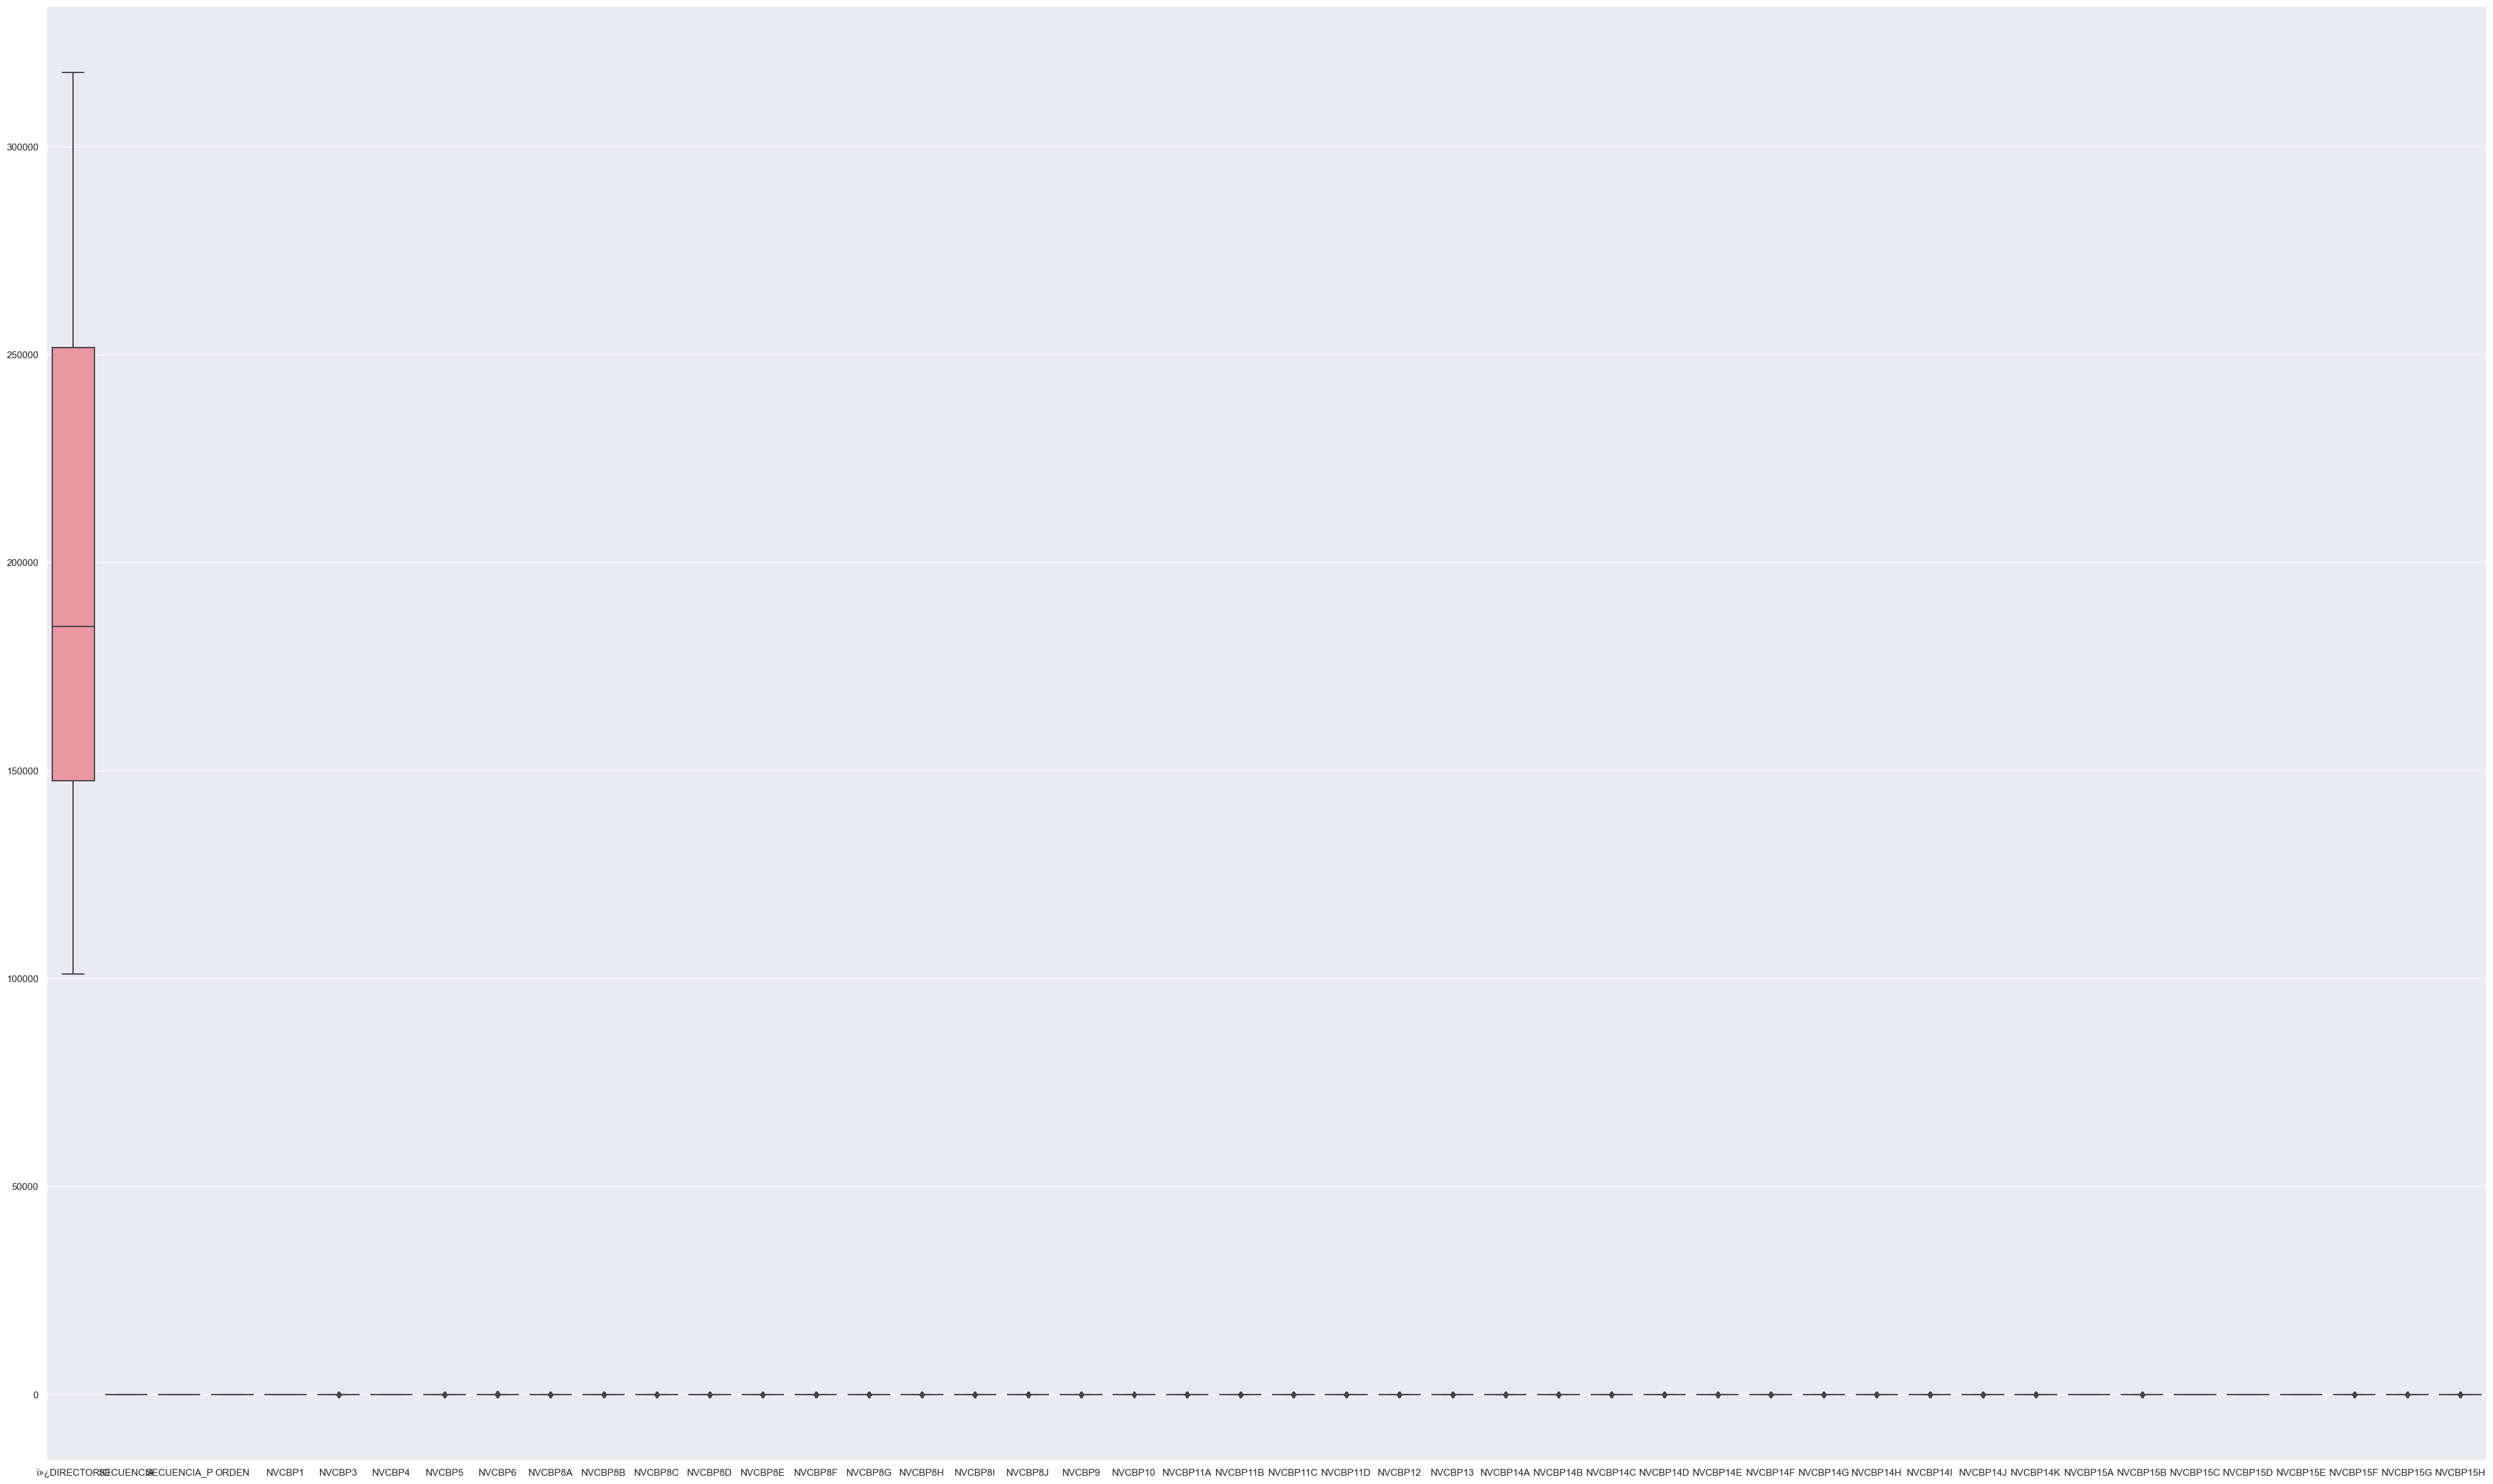

In [9]:
# Visualización de todas las variables
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=df_condiciones, orient="v")
print(">> Se visualizan los datos en conjunto: ")
plt.show()

Ya que se tienen escalas significativamente diferentes, se procede a normalizar los datos, para que que cada columna contribuya de manera igual al análisis y evitar cualquier sesgo causado por las diferencias en las escalas.

Para normalizar los datos, utilizaremos la técnica de escala Min-Max, que transforma cada valor en una columna a un valor entre 0 y 10 basado en los valores mínimo y máximo en esa columna.

Una vez que los datos estén normalizados, podemos proceder con el entendimiento de los datos al poder observarlos mejor.


<h5>1.2. Calidad de datos</h5>

En esta sección se identifican los datos que son incorrectos.

In [10]:
print(">> Se puede observar la información detallada de cada columna:\n")
df_condiciones.info()

>> Se puede observar la información detallada de cada columna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107218 entries, 0 to 107217
Data columns (total 51 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ï»¿DIRECTORIO  107218 non-null  int64 
 1   SECUENCIA      107218 non-null  int64 
 2   SECUENCIA_P    107218 non-null  int64 
 3   ORDEN          107218 non-null  int64 
 4   NVCBP1         107218 non-null  int64 
 5   NVCBP2         107218 non-null  object
 6   NVCBP3         107218 non-null  int64 
 7   NVCBP4         107218 non-null  int64 
 8   NVCBP5         107218 non-null  int64 
 9   NVCBP6         107218 non-null  int64 
 10  NVCBP7         107218 non-null  object
 11  NVCBP8A        107218 non-null  int64 
 12  NVCBP8B        107218 non-null  int64 
 13  NVCBP8C        107218 non-null  int64 
 14  NVCBP8D        107218 non-null  int64 
 15  NVCBP8E        107218 non-null  int64 
 16  NVCBP8F        107218 non-nu

In [11]:
#non_numeric_balance = df_plantas[pd.to_numeric(df_plantas['Luz'], errors='coerce').isnull()]
#print(">> A continuación se muestran los datos no numéricos de la columna:\n")
#print(non_numeric_balance[['No', 'Microbio']])


<h5>Análisis de completitud, unicidad y validez</h5>

In [12]:
pd.set_option('display.max_rows', None)

# Calcula los porcentajes de valores nulos en cada columna y muéstralos
print(">> Los porcentajes de valores nulos en cada columna son los siguientes: ")
print((df_condiciones.isnull().sum() / len(df_condiciones) * 100).sort_values(ascending=False))


>> Los porcentajes de valores nulos en cada columna son los siguientes: 
ï»¿DIRECTORIO    0.0
NVCBP14H         0.0
NVCBP11DA        0.0
NVCBP12          0.0
NVCBP13          0.0
NVCBP14A         0.0
NVCBP14B         0.0
NVCBP14C         0.0
NVCBP14D         0.0
NVCBP14E         0.0
NVCBP14F         0.0
NVCBP14G         0.0
NVCBP14I         0.0
NVCBP11C         0.0
NVCBP14J         0.0
NVCBP14K         0.0
NVCBP15A         0.0
NVCBP15B         0.0
NVCBP15C         0.0
NVCBP15D         0.0
NVCBP15E         0.0
NVCBP15F         0.0
NVCBP15G         0.0
NVCBP15H         0.0
NVCBP11D         0.0
NVCBP11B         0.0
SECUENCIA        0.0
NVCBP8B          0.0
SECUENCIA_P      0.0
ORDEN            0.0
NVCBP1           0.0
NVCBP2           0.0
NVCBP3           0.0
NVCBP4           0.0
NVCBP5           0.0
NVCBP6           0.0
NVCBP7           0.0
NVCBP8A          0.0
NVCBP8C          0.0
NVCBP11AA        0.0
NVCBP8D          0.0
NVCBP8E          0.0
NVCBP8F          0.0
NVCBP8G          0.0
NVC

In [13]:
profile = ProfileReport(df_condiciones, title="2017 Vivienda y Entorno")
profile.to_notebook_iframe()
profile.to_file("2017 Vivienda y Entorno.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]